In [42]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

In [43]:
img = cv2.imread('C:/Users/ZAKAR/Documents/GitHub/AIFFEL/Exploration/Quest13_EX03/lena.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bgr = img.copy()
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)

rectangles[[(218, 236) (373, 391)]]


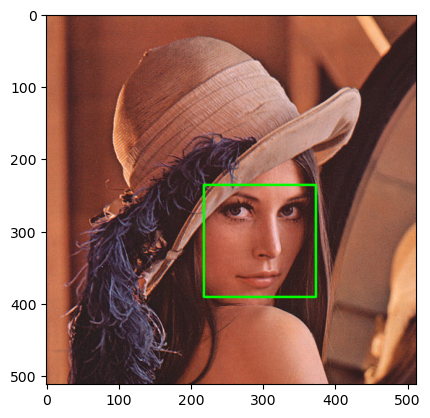

In [44]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [45]:
model_path = 'C:/Users/ZAKAR/Documents/GitHub/AIFFEL/Exploration/Quest13_EX03/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [46]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


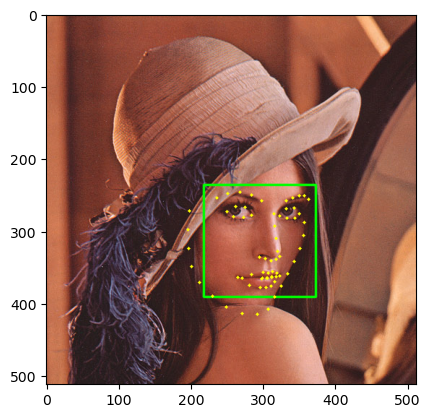

In [47]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [48]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h =dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(320, 328)
(x,y) : (320,250)
(w,h) : (156,156)


In [49]:
sticker_path = 'C:/Users/ZAKAR/Documents/GitHub/AIFFEL/Exploration/Quest13_EX03/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(156, 156, 4)


In [50]:
refined_x = x - w // 2
refined_y = y
print(f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (242,250)


In [51]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (242,250)


In [52]:
sticker_area = img[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
alpha = img_sticker[:, :, 3]
sticker_area = np.where(alpha[:, :, np.newaxis] == 0, sticker_area, img_sticker[:, :, :3]).astype(np.uint8)
img[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area

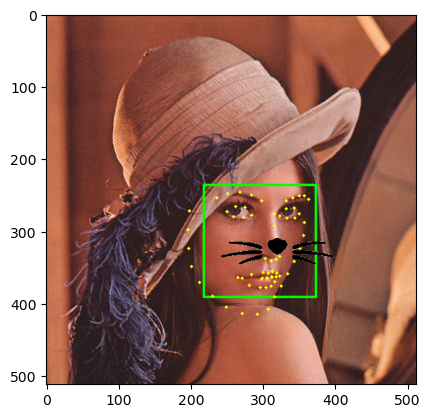

In [53]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

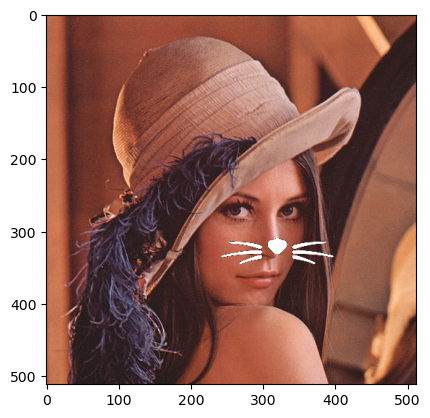

In [60]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_sticker = np.repeat(img_sticker[:, :, np.newaxis], 3, axis=2)
sticker_area = np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()
